In this project, I'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

I'll play the role of data analyst and pretend my __stakeholders want to know the following__ :
*  Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
*  Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1969]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

Now let's take a look on __basic informaion__ about our dataframes

In [1970]:
dete_survey.shape

(822, 56)

In [1971]:
dete_survey.dtypes

ID                                      int64
SeparationType                         object
Cease Date                             object
DETE Start Date                        object
Role Start Date                        object
Position                               object
Classification                         object
Region                                 object
Business Unit                          object
Employment Status                      object
Career move to public sector             bool
Career move to private sector            bool
Interpersonal conflicts                  bool
Job dissatisfaction                      bool
Dissatisfaction with the department      bool
Physical work environment                bool
Lack of recognition                      bool
Lack of job security                     bool
Work location                            bool
Employment conditions                    bool
Maternity/family                         bool
Relocation                        

In [1972]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [1973]:
tafe_survey.shape

(702, 72)

In [1974]:
tafe_survey.dtypes

Record ID                                                                                                                                                        float64
Institute                                                                                                                                                         object
WorkArea                                                                                                                                                          object
CESSATION YEAR                                                                                                                                                   float64
Reason for ceasing employment                                                                                                                                     object
Contributing Factors. Career Move - Public Sector                                                                                                          

In [1975]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


It's also will be useful to __check a missed data__ in our data frames

In [1976]:
dete_survey_sum = dete_survey.isnull().sum()
dete_survey_null_summ = dete_survey_sum[dete_survey_sum > 0]
dete_survey_null_summ.sort_values(ascending=False)

Torres Strait                  819
South Sea                      815
Aboriginal                     806
Disability                     799
NESB                           790
Business Unit                  696
Classification                 367
Opportunities for promotion     87
Career Aspirations              76
Wellness programs               56
Coach                           55
Further PD                      54
Workplace issue                 34
Feedback                        30
Health & Safety                 29
Gender                          24
Professional Development        14
Stress and pressure support     12
Age                             11
Skills                          11
My say                          10
Peer support                    10
Performance of supervisor        9
Initiative                       9
Kept informed                    9
Communication                    8
Worklife balance                 7
Staff morale                     6
Information         

In [1977]:
tafe_survey_sum = tafe_survey.isnull().sum()
tafe_survey_null_summ = tafe_survey_sum[tafe_survey_sum > 0]
tafe_survey_null_summ.sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Other                                                                                                                                      265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Next let's see on a series of __unique values__ for every column

In [1978]:
def print_unique(dataframe):
    for column in dataframe.columns[1:]:
        print("-" * 20 + "\n\n%s:\n%s" % (
            column.upper(),
            dataframe[column].value_counts()
            )
        )

In [1979]:
print_unique(dete_survey)

--------------------

SEPARATIONTYPE:
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
--------------------

CEASE DATE:
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
07/2014         2
02/2014         2
08/2012         2
04/2014         2
04/2013         2
2010            1
11/2012         1
07/2012         1
09/2014         1
09/2010         1
07/2006         1
2014            1
Name: Cease Date, dtype: int64
----------------

--------------------

NESB:
Yes    32
Name: NESB, dtype: int64


In [1980]:
print_unique(tafe_survey)

--------------------

INSTITUTE:
Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
Metropolitan South Institute of TAFE       1
The Bremer Institute of TAFE               1
Name: Institute, dtype: int64
--------------------

WORKAREA:
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64
--------------------

CESSATION YEAR:
2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64
--------------------

REASON FOR CEASING EMPLOYMENT:
Resignation                 340
Contract Expired            127
Retrenchment

Name: WorkUnitViews. Topic:29. There was adequate communication between staff in my unit, dtype: int64
--------------------

WORKUNITVIEWS. TOPIC:30. STAFF MORALE WAS POSITIVE WITHIN MY WORK UNIT:
Agree                236
Neutral              119
Strongly Agree       104
Strongly Disagree     70
Disagree              69
Not Applicable         8
Name: WorkUnitViews. Topic:30. Staff morale was positive within my work unit, dtype: int64
--------------------

INDUCTION. DID YOU UNDERTAKE WORKPLACE INDUCTION?:
Yes    541
No      78
Name: Induction. Did you undertake Workplace Induction?, dtype: int64
--------------------

INDUCTIONINFO. TOPIC:DID YOU UNDERTAKE A CORPORATE INDUCTION?:
Yes    232
No     200
Name: InductionInfo. Topic:Did you undertake a Corporate Induction?, dtype: int64
--------------------

INDUCTIONINFO. TOPIC:DID YOU UNDERTAKE A INSTITUTE INDUCTION?:
Yes    441
No      42
Name: InductionInfo. Topic:Did you undertake a Institute Induction?, dtype: int64
-------------------

From the data printed above, we can first make the following __observations__:

*  The dete_survey dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as NaN.
*  Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
*  Each dataframe contains many of the same columns, but the column names are different.
*  There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues.

We can use the `pd.read_csv()` function to __specify values that should be represented as NaN__. We'll use this function to fix the missing values first. Then, we'll __drop columns we know we don't need for our analysis__.

In [1981]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [1982]:
dete_survey_copy = dete_survey.copy()
dete_survey_updated = dete_survey_copy.drop(dete_survey.columns[28:49], axis=1)

In [1983]:
dete_survey_updated.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [1984]:
tafe_survey_copy = tafe_survey.copy()
tafe_survey_updated = tafe_survey_copy.drop(tafe_survey.columns[17:66], axis=1)

In [1985]:
tafe_survey_updated.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


Next, let's turn our attention to the __column names__. Each dataframe contains many of the same columns, but the column names are different.

Because we eventually want to combine them, we'll have to standardize the column names.

In [1986]:
dete_survey_updated.columns = dete_survey_updated.columns\
    .str.lower()\
    .str.strip()\
    .str.replace(" ", "_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [1987]:
tafe_survey_updated.rename(
    columns={
        'Record ID': 'id',
        'CESSATION YEAR': 'cease_date',
        'Reason for ceasing employment': 'separationtype',
        'Gender. What is your Gender?': 'gender',
        'CurrentAge. Current Age': 'age',
        'Employment Type. Employment Type': 'employment_status',
        'Classification. Classification': 'position',
        'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
        'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    }, inplace=True
)
tafe_survey_updated.columns = tafe_survey_updated.columns\
    .str.lower()\
    .str.strip()\
    .str.replace(".", "")\
    .str.replace("-", "")\
    .str.replace("?", "")\
    .str.replace("(", "")\
    .str.replace(")", "")\
    .str.replace("?", "")\
    .str.replace("/", "_or_")\
    .str.replace("( )+", "_", regex=True)
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_public_sector',
       'contributing_factors_career_move_private_sector',
       'contributing_factors_career_move_selfemployment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity_or_family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Next, let's remove more of the data we don't need.
Recall that our end goal is to answer the following question:

_Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?_

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `'Resignation'`.

In [1988]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [1989]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [1990]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")].copy()
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [1991]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation", na=False)].copy()
tafe_resignations

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move_public_sector,contributing_factors_career_move_private_sector,contributing_factors_career_move_selfemployment,contributing_factors_ill_health,contributing_factors_maternity_or_family,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). 

In the next step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

Let's check the years in each dataframe for logical inconsistencies

In [1992]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [1993]:
dete_resignations_cease_date_with_month = dete_resignations.loc[:, "cease_date"].str.contains("/", na=False)

In [1994]:
year_only = dete_resignations.loc[dete_resignations_cease_date_with_month, "cease_date"].str.split("/").str[1]
dete_resignations.loc[dete_resignations_cease_date_with_month, "cease_date"] = year_only
dete_resignations["cease_date"].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [1995]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

In [1996]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [1997]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [1998]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

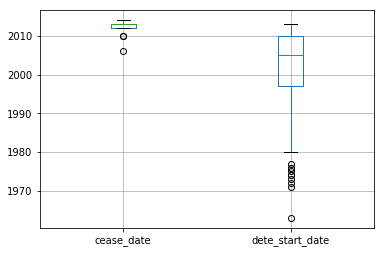

In [1999]:
dete_boxplot = dete_resignations.boxplot(column=["cease_date", "dete_start_date"])

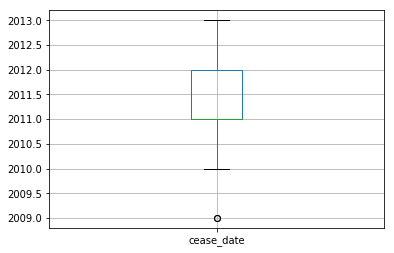

In [2000]:
tafe_tafe = tafe_resignations.boxplot(column="cease_date")

From the analysis we've done above, we can verify:
* There aren't any major issues with the years.
*  The years in each dataframe don't span quite the same number of years.

Let's calculte the __length of time an employee spent in a workplace:__

In [2001]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

We created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as `"dissatisfied"` from each dataframe:

*tafe_survey_updated*:
*  Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

*dafe_survey_updated*:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [2002]:
tafe_resignations['contributing_factors_dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors_dissatisfaction, dtype: int64

In [2003]:
tafe_resignations['contributing_factors_job_dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors_job_dissatisfaction, dtype: int64

In [2004]:
tafe_resignations[['contributing_factors_dissatisfaction', 'contributing_factors_job_dissatisfaction']].dtypes

contributing_factors_dissatisfaction        object
contributing_factors_job_dissatisfaction    object
dtype: object

In [2005]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True

In [2006]:
tafe_resignations[["contributing_factors_dissatisfaction", "contributing_factors_job_dissatisfaction"]] = tafe_resignations[["contributing_factors_dissatisfaction", "contributing_factors_job_dissatisfaction"]].applymap(update_vals)

In [2007]:
tafe_resignations['contributing_factors_dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: contributing_factors_dissatisfaction, dtype: int64

In [2008]:
tafe_resignations['contributing_factors_job_dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: contributing_factors_job_dissatisfaction, dtype: int64

In [2009]:
tafe_resignations["dissatisfied"] = tafe_resignations[["contributing_factors_dissatisfaction", "contributing_factors_job_dissatisfaction"]].any(axis=1, skipna=False)

In [2010]:
tafe_resignations["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [2011]:
dete_resignations["dissatisfied"] = tafe_resignations[["contributing_factors_dissatisfaction", "contributing_factors_job_dissatisfaction"]].any(axis=1, skipna=False)


In [2012]:
dete_resignations["dissatisfied"].value_counts(dropna=False)

NaN      177
False     96
True      38
Name: dissatisfied, dtype: int64